## Create Features

1. This file creates, normalizes and saves the feature vectors for data analysis and processing later.

In [1]:
import sys
sys.path.append('../')
import libs.dataset_analysis as da
import libs.utils as utils
import libs.text2text as tt
import pandas as pd
import numpy as np
from importlib import reload
import warnings
warnings.filterwarnings('ignore')
import spacy
import libs.ml_features as mlf
import libs.vsm as vsm
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Extract Features for v1.0_en

In [2]:
df1_en = utils.load_dataframe(language='en', version=1)
nlp_en = spacy.load('en')

In [3]:
from nltk.corpus import stopwords
EN_STOPS = set(stopwords.words('english')).difference(set(['be', 'no', 'not', 'nor', 'or', 'and', 'any', 'all', 'some']))
print(EN_STOPS)

{'having', 'my', "you'll", "aren't", 'needn', 'they', "couldn't", 'but', 'couldn', 'will', 'him', 'until', 'themselves', 'what', 'do', 'while', 'doing', 'you', 'to', 'll', 'yours', 'before', 'between', 'i', 'ours', 'whom', 'where', "isn't", 'have', 'herself', 'don', 'up', 'there', "that'll", "you've", 'such', 'against', 'through', 'during', 'each', 'its', 'myself', 'didn', 'which', "you're", 'mightn', 'that', 'how', 'off', 'aren', 'an', 'then', 'shan', 'why', 'is', 'a', 'can', "she's", 'ourselves', 'own', "you'd", 'their', 'this', 'on', 'it', 'same', 'your', 'both', 'now', 'hasn', 'here', 'just', 'shouldn', 'in', "doesn't", 'y', 'after', 'as', 'haven', 'most', 'itself', 'mustn', 'her', 'them', 'should', "mustn't", 'm', 'been', 'so', 'wouldn', 'ain', 'does', 'am', 'few', 'of', 've', 'won', 'he', 'only', 'these', 'about', 'when', 'isn', 'wasn', "shouldn't", "should've", 'under', 'being', 'the', 're', "won't", 'theirs', "haven't", 'because', "hasn't", 'did', "shan't", 'has', 'once', 'over

## 1. Inspecting Length Difference

1. We are going to inspect the first feature and see how it correlates to the final score / grade.
2. The Feature is the difference in lengths b/t the Model Answer and the Student Answer.

In [50]:
reload(mlf)
# SCONJ, PART, INJ

feature_map = {
    'Length_Difference_Simple' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE']),
    'Length_Difference_DET' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE', 'DET']),
    'Length_Difference_PART' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE', 'PART']),
    'Length_Difference_INTJ' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE', 'INTJ']),
    'Length_Difference_CONJ' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE', 'CCONJ', 'CONJ', 'SCONJ']),
    'Length_Difference_STOPS' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE'], stopwords=EN_STOPS),
}

length_diff_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

Features [100]: done.
Features [200]: done.
Features [300]: done.
Features [400]: done.
Features [500]: done.
Features [600]: done.


In [7]:
length_diff_f_df.head(3)

Length_Difference_Simple  Length_Difference_DET  Length_Difference_PART  \
0                       -15                    -14                     -15   
1                        -9                    -10                      -9   
2                        -4                     -4                      -4   

   Length_Difference_INTJ  Length_Difference_CONJ  Length_Difference_STOPS  \
0                     -15                     -16                      -15   
1                      -9                      -8                       -9   
2                      -4                      -4                       -4   

   Score  
0    4.5  
1    3.0  
2    5.0

In [8]:
length_diff_f_df.corr()

Length_Difference_Simple  Length_Difference_DET  \
Length_Difference_Simple                  1.000000               0.993587   
Length_Difference_DET                     0.993587               1.000000   
Length_Difference_PART                    0.998899               0.991271   
Length_Difference_INTJ                    0.999994               0.993587   
Length_Difference_CONJ                    0.998685               0.991818   
Length_Difference_STOPS                   1.000000               0.993587   
Score                                    -0.104902              -0.112011   

                          Length_Difference_PART  Length_Difference_INTJ  \
Length_Difference_Simple                0.998899                0.999994   
Length_Difference_DET                   0.991271                0.993587   
Length_Difference_PART                  1.000000                0.998885   
Length_Difference_INTJ                  0.998885                1.000000   
Length_Difference_CONJ                  0.997690                0.998670   
Length_Difference_STOPS                 0.998899                0.999994   
Score                                  -0.102563               -0.105297   

                          Length_Difference_CONJ  Length_Difference_STOPS  \
Length_Difference_Simple                0.998685                 1.000000   
Length_Difference_DET                   0.991818                 0.993587   
Length_Difference_PART                  0.997690                 0.998899   
Length_Difference_INTJ                  0.998670                 0.999994   
Length_Difference_CONJ                  1.000000                 0.998685   
Length_Difference_STOPS                 0.998685                 1.000000   
Score                                  -0.097146                -0.104902   

                             Score  
Length_Difference_Simple -0.104902  
Length_Difference_DET    -0.112011  
Length_Difference_PART   -0.102563  
Length_Difference_INTJ   -0.105297  
Length_Difference_CONJ   -0.097146  
Length_Difference_STOPS  -0.104902  
Score                     1.000000

### Description: 

There is a slight negative correlation between the difference in length b/t the Model Answer and Student Answers and the Score.

4.0587301587301585 1.1860523451954788
MA < SA [0.5476190476190477]: 4.24 +/- 1.05


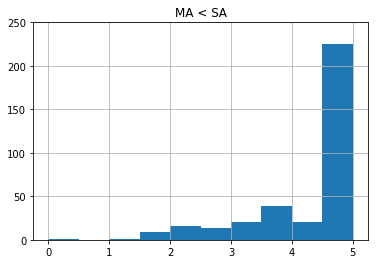

MA > SA [0.38412698412698415]: 3.80 +/- 1.33


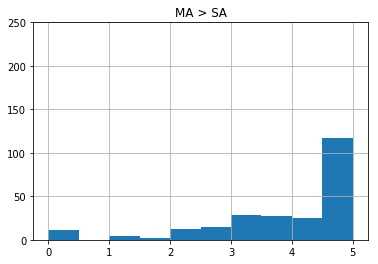

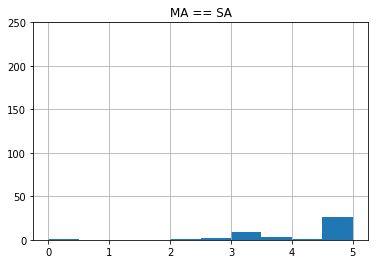

In [14]:
print(length_diff_f_df['Score'].mean(), length_diff_f_df['Score'].std())
N = len(length_diff_f_df)

plt.title("MA < SA")
plt.ylim(0,250)
longer_sa = length_diff_f_df[length_diff_f_df['Length_Difference_DET'] < 0]['Score']
longer_sa.hist()
print('MA < SA [{}]: {:.2f} +/- {:.2f}'.format(longer_sa.count() / N, longer_sa.mean(), longer_sa.std()))
plt.show()

plt.title("MA > SA")
plt.ylim(0,250)
shorter_sa = length_diff_f_df[length_diff_f_df['Length_Difference_DET'] > 0]['Score']
shorter_sa.hist()
print('MA > SA [{}]: {:.2f} +/- {:.2f}'.format(shorter_sa.count() / N, shorter_sa.mean(), shorter_sa.std()))
plt.show()

plt.title('MA == SA')
plt.ylim(0,250)
equal_sa = length_diff_f_df[length_diff_f_df['Length_Difference_DET'] == 0]['Score']
equal_sa.hist()
plt.show()

This confirms the notion that when the **Student Answer** is shorter than the **Model Answer** the grade tends to be worse.

Let's inspect some of these answers to see what they look like.

In [15]:
tmp = df1_en[length_diff_f_df['Length_Difference_DET'] > 0][['Model Answer','Student Answer','Score']]
tmp[tmp.apply(lambda x: len(x['Student Answer']) < 20, axis=1)]

Model Answer       Student Answer  \
79   It makes a copy of the function code in every ...         not answered   
136  Based on the function signature. When an overl...         not answered   
150  Based on the function signature. When an overl...           paremeters   
198  They both involve repetition; they both have t...         not answered   
221    Data members (attributes) and member functions.  An object and data.   
226    Data members (attributes) and member functions.     member functions   
243    Data members (attributes) and member functions.   Data and functions   
308  If no constructor is provided, the compiler pr...   during compilation   
342                                  Unlimited number.                    1   
344                                  Unlimited number.                  One   
348                                  Unlimited number.             infinite   
356                                  Unlimited number.              several   
357                                  Unlimited number.                  One   
358                                  Unlimited number.                  one   
361                                  Unlimited number.                  one   
364                                  Unlimited number.                  one   
400  To store a class interface, including data mem...                   No   
465  The testing stage can influence both the codin...  Refining and Coding   
469  The testing stage can influence both the codin...            Refining.   
477  The testing stage can influence both the codin...  coding and refining   
483  The testing stage can influence both the codin...               coding   
519                              At the main function.           Int main()   
520                              At the main function.          main method   
523                              At the main function.                 main   
525                              At the main function.     The main method.   
526                              At the main function.          At the root   
531                              At the main function.   The main function.   
532                              At the main function.    The function main   
534                              At the main function.        main function   
535                              At the main function.                 main   
537                              At the main function.              At main   
583  Variables can be declared anywhere in a progra...   Inside the method.   
584  Variables can be declared anywhere in a progra...           at the top   
626  The block inside a do...while statement will e...            NO ANSWER   

     Score  
79     0.0  
136    0.0  
150    4.5  
198    0.0  
221    2.0  
226    3.5  
243    4.5  
308    3.5  
342    0.0  
344    0.0  
348    5.0  
356    4.5  
357    0.0  
358    0.0  
361    0.0  
364    0.0  
400    0.0  
465    5.0  
469    3.0  
477    5.0  
483    3.0  
519    5.0  
520    5.0  
523    5.0  
525    5.0  
526    2.5  
531    5.0  
532    5.0  
534    5.0  
535    5.0  
537    5.0  
583    2.5  
584    1.5  
626    0.0

Even though there is a correlation. Many sstudents wrote no answer, no, or something incorrect for short answers. Still there were many 5.0 perfect scores for the answers.

## Feature 2: Count and Tfidf Vectorizers and Various Distance Metrics

In [52]:
reload(mlf)
from scipy.spatial import distance
# SCONJ, PART, INJ

def basic_tokenizer_no_stops(sent):
    results = []
    for t in nlp_en(sent):
        if t.pos_ in ['SPACE', 'PUNCT']:
            continue
        if t.pos_ in ['PRON', 'PROPN']:
            results.append(t.text.lower())
        else:
            results.append(t.lemma_)
    return results

def basic_tokenizer_stops(sent):
    results = []
    for t in nlp_en(sent):
        if t.pos_ in ['SPACE', 'PUNCT'] or t.lemma_ in EN_STOPS:
            continue
        if t.pos_ in ['PRON', 'PROPN']:
            results.append(t.text.lower())
        else:
            results.append(t.lemma_)
    return results

count_vec1 = mlf.create_count_vectorizer(basic_tokenizer_no_stops)
count_vec2 = mlf.create_count_vectorizer(basic_tokenizer_stops)
count_vec_ng2 = mlf.create_count_vectorizer(basic_tokenizer_stops, ngram_range=(1,2))
count_vec_ng3 = mlf.create_count_vectorizer(basic_tokenizer_stops, ngram_range=(1,3))
count_vec_ng2o = mlf.create_count_vectorizer(basic_tokenizer_stops, ngram_range=(2,2))
count_vec_ng3o = mlf.create_count_vectorizer(basic_tokenizer_stops, ngram_range=(3,3))

feature_map = {
    "CV_Cos_NoStops" : mlf.create_feature_vectorizer_distance(count_vec1, mlf.cosine_similarity),
    "CV_Cos_Stops" : mlf.create_feature_vectorizer_distance(count_vec2, mlf.cosine_similarity),
    "CV_Jac_Stops" : mlf.create_feature_vectorizer_distance(count_vec2, mlf.jaccard_similarity),
    "CV_Euclidean" : mlf.create_feature_vectorizer_distance(count_vec2, distance.euclidean),
    "CV_CityBlock" : mlf.create_feature_vectorizer_distance(count_vec2, distance.cityblock),
    "CV_JSD" : mlf.create_feature_vectorizer_distance(count_vec2, mlf.jensen_shannon_divergence),
    "CV_CS_NG12" : mlf.create_feature_vectorizer_distance(count_vec_ng2, mlf.cosine_similarity),
    "CV_CS_NG13" : mlf.create_feature_vectorizer_distance(count_vec_ng3, mlf.cosine_similarity),
    "CV_CS_NG22" : mlf.create_feature_vectorizer_distance(count_vec_ng2o, mlf.cosine_similarity),
    "CV_CS_NG33" : mlf.create_feature_vectorizer_distance(count_vec_ng3o, mlf.cosine_similarity)
}

vec_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

In [22]:
vec_f_df.corr()

CV_Cos_NoStops  CV_Cos_Stops  CV_Jac_Stops  CV_Euclidean  \
CV_Cos_NoStops        1.000000      0.854770      0.669045     -0.222661   
CV_Cos_Stops          0.854770      1.000000      0.772517     -0.323637   
CV_Jac_Stops          0.669045      0.772517      1.000000     -0.583673   
CV_Euclidean         -0.222661     -0.323637     -0.583673      1.000000   
CV_CityBlock         -0.179558     -0.262788     -0.507883      0.959880   
CV_JSD               -0.834128     -0.970062     -0.825021      0.380653   
CV_CS_NG12            0.840291      0.969827      0.804463     -0.356363   
CV_CS_NG13            0.812351      0.935039      0.828872     -0.394007   
CV_CS_NG22            0.649136      0.718668      0.727074     -0.375956   
CV_CS_NG33            0.458461      0.419443      0.392036     -0.222596   
Score                 0.460393      0.457885      0.388807     -0.133925   

                CV_CityBlock    CV_JSD  CV_CS_NG12  CV_CS_NG13  CV_CS_NG22  \
CV_Cos_NoStops     -0.179558 -0.834128    0.840291    0.812351    0.649136   
CV_Cos_Stops       -0.262788 -0.970062    0.969827    0.935039    0.718668   
CV_Jac_Stops       -0.507883 -0.825021    0.804463    0.828872    0.727074   
CV_Euclidean        0.959880  0.380653   -0.356363   -0.394007   -0.375956   
CV_CityBlock        1.000000  0.329900   -0.286839   -0.315560   -0.305549   
CV_JSD              0.329900  1.000000   -0.948795   -0.921222   -0.730349   
CV_CS_NG12         -0.286839 -0.948795    1.000000    0.988916    0.859391   
CV_CS_NG13         -0.315560 -0.921222    0.988916    1.000000    0.891180   
CV_CS_NG22         -0.305549 -0.730349    0.859391    0.891180    1.000000   
CV_CS_NG33         -0.203525 -0.425283    0.511914    0.543703    0.620824   
Score              -0.138915 -0.453422    0.436495    0.417945    0.313960   

                CV_CS_NG33     Score  
CV_Cos_NoStops    0.458461  0.460393  
CV_Cos_Stops      0.419443  0.457885  
CV_Jac_Stops      0.392036  0.388807  
CV_Euclidean     -0.222596 -0.133925  
CV_CityBlock     -0.203525 -0.138915  
CV_JSD           -0.425283 -0.453422  
CV_CS_NG12        0.511914  0.436495  
CV_CS_NG13        0.543703  0.417945  
CV_CS_NG22        0.620824  0.313960  
CV_CS_NG33        1.000000  0.199752  
Score             0.199752  1.000000

It makes sense that the cosine distance would be the best measurement for count vectors since it doesn't look at the distance of their endpoints but only at the angle b/t the two vectors.

What is interesting though is that the Jensen-Shannon Divergence is even more correlated. It appears looking at the vectors as probability distributions somehow adds more insight.

Best: **Jensen-Shannon Divergence**, **Cosine Similarity**.

In [53]:
## Let's try with TfIdf Vectors now
reload(mlf)

ng1 = mlf.create_feature_ngram_scorer(mlf.unigram_score, stopwords=EN_STOPS)
ng2 = mlf.create_feature_ngram_scorer(mlf.bigram_score, stopwords=EN_STOPS)
ng2_3 = mlf.create_feature_ngram_scorer(mlf.bigram_score, stopwords=EN_STOPS, factor=1/3)
ng2_4 = mlf.create_feature_ngram_scorer(mlf.bigram_score, stopwords=EN_STOPS, factor=1/4)
ng3 = mlf.create_feature_ngram_scorer(mlf.trigram_score, stopwords=EN_STOPS)
ng3_4 = mlf.create_feature_ngram_scorer(mlf.trigram_score, stopwords=EN_STOPS, factor=1/4)
ng3_5 = mlf.create_feature_ngram_scorer(mlf.trigram_score, stopwords=EN_STOPS, factor=1/5)

feature_map = {
    "NG1" : ng1,
    "NG2" : ng2,
    "NG2_3": ng2_3,
    "NG2_4": ng2_4,
    "NG3" : ng3,
    "NG3_4": ng3_4,
    "NG3_5": ng3_5
}

ngrams_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

In [27]:
ngrams_f_df.corr()

NG1       NG2     NG2_3     NG2_4       NG3     NG3_4     NG3_5  \
NG1    1.000000  0.840099  0.801311  0.765139  0.674025  0.657903  0.644214   
NG2    0.840099  1.000000  0.978424  0.948934  0.807214  0.790364  0.775672   
NG2_3  0.801311  0.978424  1.000000  0.993563  0.755041  0.752137  0.746149   
NG2_4  0.765139  0.948934  0.993563  1.000000  0.710059  0.714195  0.712734   
NG3    0.674025  0.807214  0.755041  0.710059  1.000000  0.994320  0.985273   
NG3_4  0.657903  0.790364  0.752137  0.714195  0.994320  1.000000  0.997868   
NG3_5  0.644214  0.775672  0.746149  0.712734  0.985273  0.997868  1.000000   
Score  0.458006  0.435271  0.451092  0.450229  0.341802  0.346447  0.347204   

          Score  
NG1    0.458006  
NG2    0.435271  
NG2_3  0.451092  
NG2_4  0.450229  
NG3    0.341802  
NG3_4  0.346447  
NG3_5  0.347204  
Score  1.000000

## Feature 4: Knowledge-Based and Corpus Based similarity Metrics


In [54]:
reload(mlf)

from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')
resnik_func = tt.create_resnik_function(brown_ic)
jiang_conrath_fn = tt.create_jiang_conrath_function(brown_ic)

feature_map = {
    "LCH" : mlf.create_wordnet_features(tt.leacock_chodorow_similarity, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB']),
    "WUP" : mlf.create_wordnet_features(tt.wup_similarity, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB']),
    "Resnik" : mlf.create_wordnet_features(resnik_func, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB']),
    "Jiang_Conrath" : mlf.create_wordnet_features(jiang_conrath_fn, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB'])
    #"Shortest_Path" : mlf.create_wordnet_features(tt.shortest_path, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB']),
    #"Shortest_Path_LM" : mlf.create_wordnet_features(tt.shortest_path, 'eng', stopwords=EN_STOPS, add_lexical_matching=True, open_classes=['NOUN', 'VERB']),
    #"Shortest_Path_ADJ" : mlf.create_wordnet_features(tt.shortest_path, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB', 'ADJ']),
    #"Shortest_Path_ADV" : mlf.create_wordnet_features(tt.shortest_path, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB', 'ADV']),
    #"Shortest_Path_ALL" : mlf.create_wordnet_features(tt.shortest_path, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB', 'ADV', 'ADJ'])
}

knowledge_base_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

In [14]:
knowledge_base_f_df.corr()

LCH       WUP    Resnik  Jiang_Conrath     Score
LCH            1.000000  0.978725  0.958316       0.913057  0.368283
WUP            0.978725  1.000000  0.954374       0.866292  0.329028
Resnik         0.958316  0.954374  1.000000       0.954638  0.356741
Jiang_Conrath  0.913057  0.866292  0.954638       1.000000  0.404197
Score          0.368283  0.329028  0.356741       0.404197  1.000000

## Feature 5: Vector Space Model Features

In [ ]:
gensim_model = vsm.load_gensim_model()

In [18]:
reload(mlf)

feature_map = {
    "WMD" : mlf.create_feature_wmdistance(gensim_model, stopwords=EN_STOPS),
    "Spacy_VCOS" : mlf.create_feature_vector_cosine(),
}

vsm_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

Features [100]: done.
Features [200]: done.
Features [300]: done.
Features [400]: done.
Features [500]: done.
Features [600]: done.


In [20]:
vsm_f_df.corr()

WMD  Spacy_VCOS     Score
WMD         1.000000   -0.714435 -0.298508
Spacy_VCOS -0.714435    1.000000  0.348754
Score      -0.298508    0.348754  1.000000

## Feature 6: Token Based Features

In [25]:
reload(mlf)


def preprocess_neg(sent):
    results = []
    for t in sent:
        if t.lemma_ in EN_STOPS or t.pos_ in ['PUNCT', 'SPACE', 'DET']:
            continue
        else:
            prefix = ''
            if 'neg' in [t.dep_ for t in t.children]:
                prefix = 'neg_'
            label = ''
            if t.pos_ in ['PROPN', 'PREP']:
                label = t.text.lower()
            else:
                label = t.lemma_
            tkn = '{}{}'.format(prefix, label)
            results.append(tkn)
    return results


def preprocess(sent):
    results = []
    for t in sent:
        if t.lemma_ in EN_STOPS or t.pos_ in ['PUNCT', 'SPACE', 'DET']:
            continue
        else:
            if t.pos_ in ['PROPN', 'PREP']:
                results.append(t.text.lower())
            else:
                results.append(t.lemma_)
    return results

feature_map = {
    "Dice" : mlf.create_feature_token_based(mlf.lexical_dice_coefficient, preprocess),
    "Jaccard" : mlf.create_feature_token_based(mlf.lexical_jaccard_coefficient, preprocess),
    "Cosine" : mlf.create_feature_token_based(mlf.lexical_cosine_coefficient, preprocess),
    "Cosine_Neg" : mlf.create_feature_token_based(mlf.lexical_cosine_coefficient, preprocess_neg),
    "Faucett" : mlf.create_feature_token_based(mlf.lexical_faucett_coefficient, preprocess),
    "Faucett_Neg" : mlf.create_feature_token_based(mlf.lexical_faucett_coefficient, preprocess_neg)
}

tokens_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

Features [100]: done.
Features [200]: done.
Features [300]: done.
Features [400]: done.
Features [500]: done.
Features [600]: done.


In [26]:
tokens_f_df.corr()

Dice   Jaccard    Cosine  Cosine_Neg   Faucett  Faucett_Neg  \
Dice         1.000000  0.977756  0.996095    0.992365  0.979451     0.976915   
Jaccard      0.977756  1.000000  0.969287    0.966891  0.933102     0.931460   
Cosine       0.996095  0.969287  1.000000    0.996318  0.981553     0.979049   
Cosine_Neg   0.992365  0.966891  0.996318    1.000000  0.977887     0.981194   
Faucett      0.979451  0.933102  0.981553    0.977887  1.000000     0.997709   
Faucett_Neg  0.976915  0.931460  0.979049    0.981194  0.997709     1.000000   
Score        0.481084  0.444672  0.491955    0.486810  0.486622     0.482661   

                Score  
Dice         0.481084  
Jaccard      0.444672  
Cosine       0.491955  
Cosine_Neg   0.486810  
Faucett      0.486622  
Faucett_Neg  0.482661  
Score        1.000000

## Feature 7: Syntactical Features

In [46]:
reload(mlf)


def filter_tokens(sent):
    results = []
    for t in sent:
        if (t.lemma_ in EN_STOPS or t.pos_ in ['PUNCT', 'SPACE', 'DET']) and not t.dep_ == 'ROOT':
            continue
        else:
            results.append(t)
    return results

feature_map = {
    #"Edit_Dist" : mlf.create_feature_token_based(mlf.basic_edit_distance, preprocess),
    #"Edit_Dist_Neg" : mlf.create_feature_token_based(mlf.basic_edit_distance, preprocess_neg),
    #"POS_ED" : mlf.create_feature_pos_edit_distance(filter_tokens),
    #"DepParse_ED" : mlf.create_feature_dp_edit_distance(filter_tokens)
    #"Tree_Edit_Dist" : mlf.create_feature_tree_edit_distance(filter_tokens),
    "Bleu_Score" : mlf.create_feature_bleu_score(preprocess)
}

syntax_f_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

Features [100]: done.
Features [200]: done.
Features [300]: done.
Features [400]: done.
Features [500]: done.
Features [600]: done.


In [47]:
syntax_f_df.corr()

Bleu_Score     Score
Bleu_Score    1.000000  0.212226
Score         0.212226  1.000000

## Save Features as DataFrame

In [58]:
reload(mlf)

feature_map = {
    # Syntax
    'Bleu_Score' : mlf.create_feature_bleu_score(preprocess),
    "ED" : mlf.create_feature_token_based(mlf.basic_edit_distance, preprocess),
    "POS_ED" : mlf.create_feature_pos_edit_distance(filter_tokens),
    "DepParse_ED" : mlf.create_feature_dp_edit_distance(filter_tokens),
    "Tree_ED" : mlf.create_feature_tree_edit_distance(filter_tokens),
    
    # Tokens and Sentence Level
    "Tkn_Cosine" : mlf.create_feature_token_based(mlf.lexical_cosine_coefficient, preprocess),
    "NGram_1" : mlf.create_feature_ngram_scorer(mlf.unigram_score, stopwords=EN_STOPS),
    "NGram_2" : mlf.create_feature_ngram_scorer(mlf.bigram_score, stopwords=EN_STOPS, factor=1/3),
    "NGram_3" : mlf.create_feature_ngram_scorer(mlf.trigram_score, stopwords=EN_STOPS, factor=1/5),
    "BoW_Cos" : mlf.create_feature_vectorizer_distance(count_vec2, mlf.cosine_similarity),
    "BoW_JSD" : mlf.create_feature_vectorizer_distance(count_vec2, mlf.jensen_shannon_divergence),
    'Length_Diff' : mlf.create_feature_length_difference(pos_ignore=['PUNCT', 'SPACE', 'DET']),
    
    # Semantics
    "WMD" : mlf.create_feature_wmdistance(gensim_model, stopwords=EN_STOPS),
    "Vec_Cosine" : mlf.create_feature_vector_cosine(),
    "KB_WUP" : mlf.create_wordnet_features(tt.wup_similarity, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB', 'ADJ', 'ADV']),
    "KB_JNC" : mlf.create_wordnet_features(jiang_conrath_fn, 'eng', stopwords=EN_STOPS, add_lexical_matching=False, open_classes=['NOUN', 'VERB', 'ADJ', 'ADV'])
}

final_features_df = mlf.feature_builder(df1_en, nlp_en, feature_map, logging=True)

Features [100]: done.
Features [200]: done.
Features [300]: done.
Features [400]: done.
Features [500]: done.
Features [600]: done.


In [56]:
final_features_df.head(3)

GID     Bleu_Score        ED    POS_ED  DepParse_ED  Tree_ED  Tkn_Cosine  \
0  1.1   2.272393e-32  0.857143  0.714286     0.785714     34.0    0.539360   
1  1.1  2.172090e-124  0.750000  0.583333     0.583333     92.0    0.404520   
2  1.1   2.921595e-01  0.555556  0.444444     0.444444     41.0    0.632456   

    NGram_1   NGram_2   NGram_3   BoW_Cos   BoW_JSD  Length_Diff       WMD  \
0  0.315789  0.598408  0.630957  0.381385  0.380280          -14  2.077197   
1  0.250000  0.333333  0.000000  0.478091  0.395186          -10  2.250237   
2  0.545455  0.829827  0.858621  0.674200  0.242956           -4  1.800416   

   Vec_Cosine    KB_WUP    KB_JNC  Score  
0    0.734018  1.076923  1.000000    4.5  
1    0.717958  0.917904  0.590004    3.0  
2    0.953560  1.052448  1.000000    5.0

In [57]:
final_features_df.to_csv('../datasets/features/asag_v1_en.csv', sep='~', index=False)

## Feature Set 2: Add More Features

In [14]:
import libs.bag_of_words as bow
import libs.ngrams as ng
reload(mlf)
reload(ng)

# Count-Tokenizer
df2_en = utils.load_dataframe(version=2, language='en')

def preprocess(sent):
    results = []
    for t in sent:
        if t.lemma_ in EN_STOPS or t.pos_ in ['PUNCT', 'SPACE', 'DET']:
            continue
        else:
            if t.pos_ in ['PROPN', 'PREP']:
                results.append(t.text.lower())
            else:
                results.append(t.lemma_)
    return results

def basic_tokenizer_stops(sent):
    results = []
    for t in nlp_en(sent):
        if t.pos_ in ['SPACE', 'PUNCT'] or t.lemma_ in EN_STOPS:
            continue
        if t.pos_ in ['PRON', 'PROPN']:
            results.append(t.text.lower())
        else:
            results.append(t.lemma_)
    return results

count_tokenizer = bow.create_count_vectorizer(EN_STOPS, tokenizer=basic_tokenizer_stops,ngram_range=(1,1))

feature_map = {
    
    # Literal Distance
    "Edit_Dist" : mlf.create_feature_token_based(mlf.basic_edit_distance, preprocess),
    'Bleu_Score' : mlf.create_feature_bleu_score(preprocess, smoothing_function=mlf.SF.method2),
    
    # BoW Features
    'Count_BoW' : bow.create_feature_bow_counter(count_tokenizer),
    "NGram_1" : ng.create_feature(ng.ngram_score, ngram_size=1, stopwords=EN_STOPS),
    "NGram_2" : ng.create_feature(ng.ngram_score, ngram_size=2, stopwords=EN_STOPS, factor=1/3),
    "NGram_3" : ng.create_feature(ng.ngram_score, ngram_size=3, stopwords=EN_STOPS, factor=1/5),
}

df2_en_features_df = mlf.feature_builder(df2_en, nlp_en, feature_map, logging=True)

Features [100]: done.
Features [200]: done.
Features [300]: done.
Features [400]: done.
Features [500]: done.
Features [600]: done.


In [23]:
values = df2_en_features_df.drop(['GID'], axis=1).as_matrix()

In [57]:
import libs.feature_analysis as fa
reload(fa)

scores = df2_en['Score4']
res = fa.compute_tsne(values, perplexity=30, random_state=42)

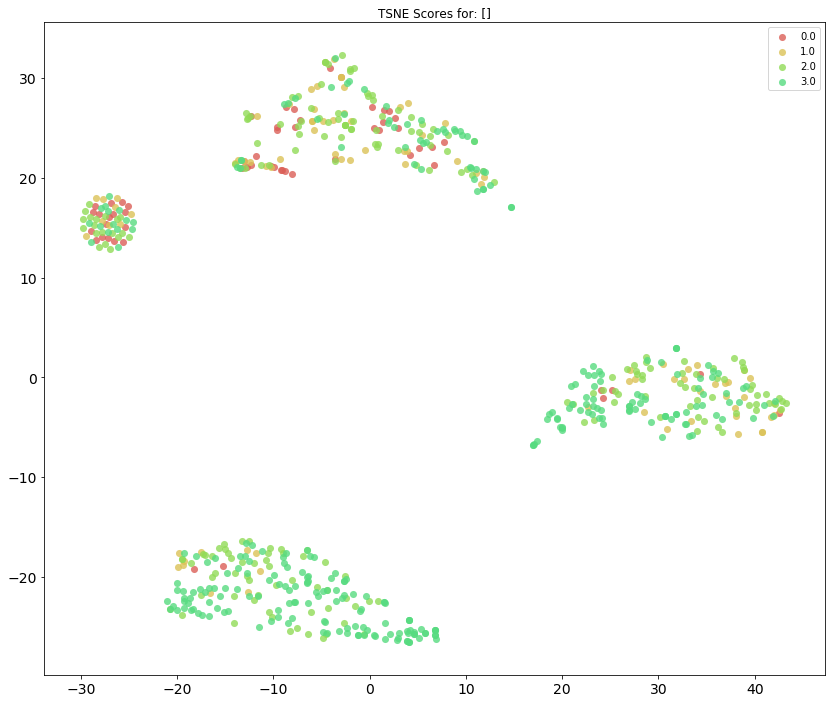

In [58]:
fa.plot_tsne(res, df2_en['Score4'])

In [64]:
# Prepared with: perplexity=30, random_state=42
#
### Object 1 (Upper Left)obj1 = fa.select_indexes_from_tsne(res, [-34,-20], [10,25])
# 1. Short Model Answers and Relatively Long Student Answers.
# 2. Short Student Answers or simple "Not Answered" responses.
obj1 = fa.select_indexes_from_tsne(res, [-34,-20], [10,25])

### Object 2 (Bottom Left):
# 1. These are almost fully correct_complete type answers. Most match on unigrams, bigrams and trigrams a fair amount
# 2. The poor scores look structurally similar to the good ones but due to other words have incorrect meanings.
# 3. The bad answers will match on ngrams but usually not the "key" concept ones. see: 572
obj2 = fa.select_indexes_from_tsne(res, [-34,10], [-30,-12])


### Object 3 (Mid Right)
# 1. These have no trigrams. They are questions for which no tuples of size N=3 match
# 2. They still have relatively high bigram and trigram matches though.
obj3 = fa.select_indexes_from_tsne(res, [12,45], [-12,6])

### Object 4 (Top)
# 1. These no trigrams and no bigram matches. 
# 2. Their overall NGram matches are also low.
# 3. This group has large Edit_Distances and Low Bleu Scores (which means that syntactically / structurally they are not very similar)
# 4. This is why there is the most variance in scoring here.
obj4 = fa.select_indexes_from_tsne(res, [-20,20], [13,34])
len(df2_en[obj4])
merged_opt = utils.merge_dataframe(df2_en[obj4], df2_en_features_df.drop(['GID'], axis=1)[obj4]).copy()
merged_opt = merged_opt.drop(['AID', 'QID', 'SID', 'Score4','Score3','Score2'], axis=1)
merged_opt.to_csv("./tmp/bottom_object4.csv", sep='~')